**Reference**:
- <https://stats.stackexchange.com/questions/20227/why-is-rss-distributed-chi-square-times-n-p/76748#76748>
- <https://daviddalpiaz.github.io/appliedstats/inference-for-simple-linear-regression.html>

In [56]:
library(tidyverse)
library(patchwork)

# Sampling distribution for regression coefficients

For proof, see: <https://daviddalpiaz.github.io/appliedstats/inference-for-simple-linear-regression.html>

$$\hat{\beta_1} \sim N\left(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}\right)$$

$$\hat{\beta_0} \sim N\left(\beta_0, \sigma^2 \left(\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}\right)\right)$$

# Simulate sampling distribution for regression coefficients

In [7]:
# coefficients of the true model
beta_0 <- 3
beta_1 <- 6
sigma <- 2

# sample size
n <- 100
x <- seq(1, 10, length.out = n)

# calculate reponse y from x and the coefficients of the mmodel
simulate_slr <- function(x, beta_0, beta_1, sigma) {
  nobs <- length(x)
  epsilon <- rnorm(nobs, mean = 0, sd = sigma)
  y <- beta_0 + beta_1 * x + epsilon
  (df <- tibble(predictor = x, response = y))
}

# this function will sample data then calculate the estimated coefficients for the true model
estimate_beta <- function() {
  sample_data <- simulate_slr(x, beta_0, beta_1, sigma)
  mod <- lm(response ~ predictor, data = sample_data)
  coef(mod)
}

# simulation for 10000 times
res <- map_dfr(1:10000, ~ estimate_beta())
names(res) <- c('beta0', 'beta1')
head(res)

beta0,beta1
<dbl>,<dbl>
2.167336,6.090357
2.670254,6.046238
3.537895,5.969716
3.439605,5.888020
3.349673,6.013970
3.231635,5.956688


In [10]:
# the mean of beta_0 and beta_1  (beta_0 and beta_1 are sample statistics)
res %>% map_dbl(mean)
# true beta_0 and beta_1
c(beta0 = beta_0, beta1 = beta_1)

beta0    beta1 
2.998822 5.999722

beta0 beta1 
    3     6

In [12]:
# the standard error of beta_0 and beta_1
res %>% map_dbl(sd)

# the standard error of beta_0 in theory
sigma * sqrt(1/n + mean(x)^2/sum((x-mean(x))^2))

# the stardard error of beta_1 in theory
sqrt(sigma^2/sum((x - mean(x))^2))



beta0      beta1 
0.46454332 0.07577896

[1] 0.4644454

[1] 0.07621405

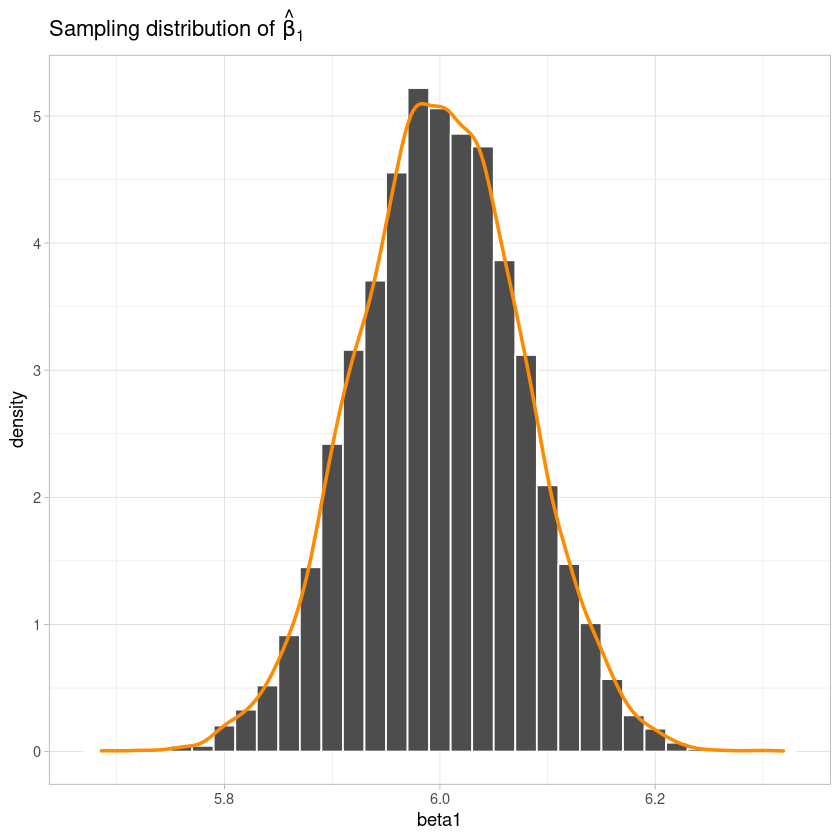

In [26]:
# sampling distribution of beta_1 (beta_1 is a sample statistics) 
# like sampling distribution of the mean(mean is a sample statistic)
res %>% 
  ggplot(aes(beta1, ..density..)) + 
  geom_histogram(binwidth = .02, fill = 'grey30', color = 'white') +
  geom_density(size = 1, color = 'darkorange') + 
  labs(title = expression('Sampling distribution of' ~ hat(beta)[1])) +
  theme_light()

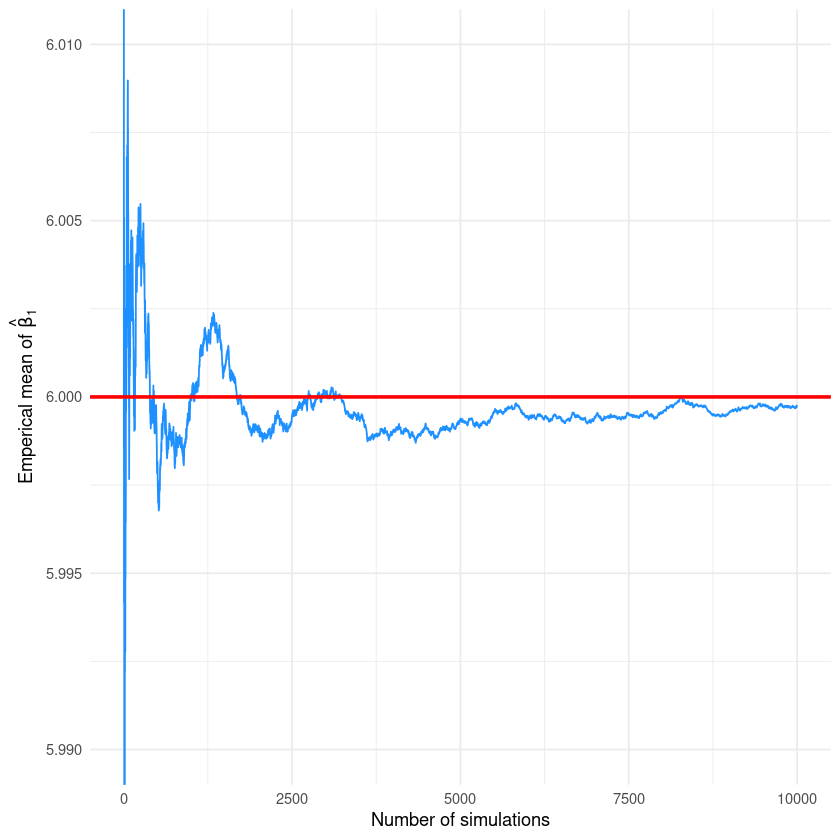

In [25]:
# The mean of of estimated beta_0 as the number of simulation grows to infinity
res %>% 
mutate(size = row_number(), expected_beta_1 = cummean(beta1)) %>%
ggplot(aes(size, expected_beta_1)) +
geom_line(color = 'dodgerblue') +
geom_hline(yintercept = beta_1, size = 1, color = 'red') + 
labs(x = 'Number of simulations', y = expression('Emperical mean of' ~ hat(beta)[1])) +
coord_cartesian(ylim = c(5.99, 6.01)) +
theme_minimal()

# `cars` examples

In [27]:
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


In [29]:
mod <- lm(dist ~ speed, data = cars)
report <- summary(mod)
report


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


In [31]:
names(report)

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

## significance of regressions, T-test

In [32]:
report$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-17.579095,6.7584402,-2.601058,1.231882e-02
speed,3.932409,0.4155128,9.463990,1.489836e-12


p value of speed < alpha = 5%, reject the null hypothesis that there is no linear relationship between speed and stopping distance

## confidence interval for model parameters

>**`stats::confint()`**

In [35]:
confint(mod, levl = .99)

,2.5 %,97.5 %
(Intercept),-31.167850,-3.990340
speed,3.096964,4.767853


# Confidence interval for the mean response

> The confidence interval for the true mean response for each predictor x<sub>i</sub>. Remember that $\hat{y_i}$ is just an unbiased estimation of the true mean response

<b style = 'color:red'>NOTE:</b>Read the chapter for the math

> using **`predict()`**

In [62]:
# predict is a generic function
# for class `lm`
# see ?predict.lm for more

we are finding the confidence interval for the mean stopping distance when a car is travelling 5 miles per hour and when a car is travelling 21 miles per hour.

In [63]:
# using interval = "confidence"
intervals <- predict(mod, interval = 'confidence', level = .99)
head(intervals)

,fit,lwr,upr
1,-1.849460,-15.829981,12.13106
2,-1.849460,-15.829981,12.13106
3,9.947766,-1.082870,20.97840
4,9.947766,-1.082870,20.97840
5,13.880175,3.778197,23.98215
6,17.812584,8.597968,27.02720


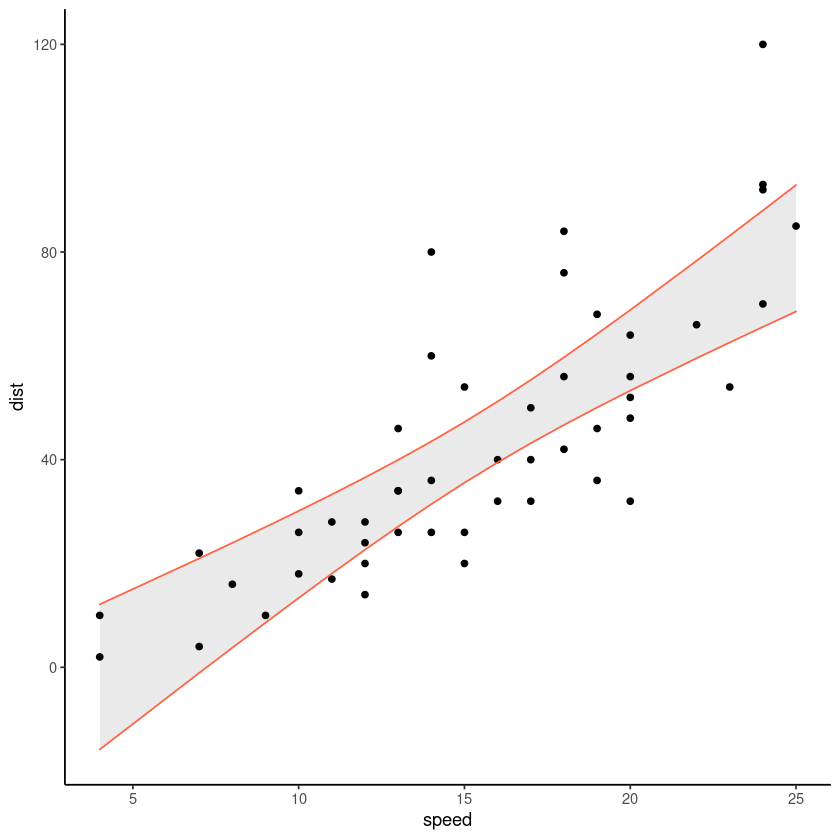

In [64]:
# manually plot the confidence interval for the mean response
cars %>% 
bind_cols(as_tibble(intervals)) %>% 
ggplot(aes(speed, dist)) + 
geom_point() + 
geom_ribbon(aes(ymin = lwr, ymax = upr), alpha = .1, color = 'tomato') +
theme_classic() 

# Confidence interval for new observation (prediction band)

<b style = 'color:red'>NOTE:</b> Read the chapter for the math

In [65]:
new_speed <- data.frame(speed = c(5, 21))
# using interval = 'prediction'
predict(mod, new_speed, interval = 'prediction', level = .99)

,fit,lwr,upr
1,2.082949,-41.16099,45.32689
2,65.001489,22.87494,107.12803


Also notice that these two intervals are wider than the corresponding confidence intervals for the mean response. See why, read this chapter of the book

# Confidence and prediction bands

Often we will like to plot both confidence intervals for the mean response and prediction intervals for all possible values of
x
 . We calls these confidence and prediction bands.

In [85]:
speed_grid <-  seq(min(cars$speed), max(cars$speed), by = .01)

confidence <- predict(mod, tibble(speed =speed_grid), interval = "confidence", level = .99)
prediction_bands <- predict(mod, tibble(speed = speed_grid), interval = "prediction", level = .99)

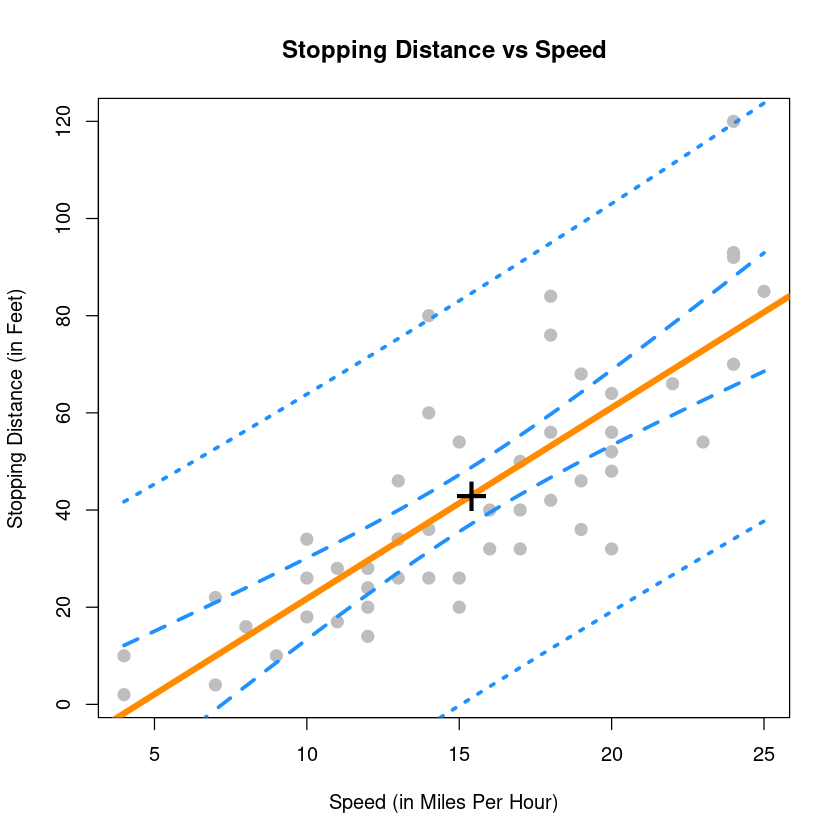

In [86]:
plot(dist ~ speed, data = cars,
     xlab = "Speed (in Miles Per Hour)",
     ylab = "Stopping Distance (in Feet)",
     main = "Stopping Distance vs Speed",
     pch  = 20,
     cex  = 2,
     col  = "grey")

abline(mod, col = 'darkorange', lwd = 5)
lines(speed_grid, confidence[,"lwr"], col = "dodgerblue", lwd = 3, lty = 2)
lines(speed_grid, confidence[,"upr"], col = "dodgerblue", lwd = 3, lty = 2)
lines(speed_grid, prediction_bands[,"lwr"], col = "dodgerblue", lwd = 3, lty = 3)
lines(speed_grid, prediction_bands[,"upr"], col = "dodgerblue", lwd = 3, lty = 3)
points(mean(cars$speed), mean(cars$dist), pch = "+", cex = 3)


# Significance of Regression, F-test

Read the chapter for understanding

---
Using anova to compare 2 models:

In [88]:
anova(lm(dist~1, data=cars), lm(dist~speed, data=cars)) %>% print()

Analysis of Variance Table

Model 1: dist ~ 1
Model 2: dist ~ speed
  Res.Df   RSS Df Sum of Sq      F   Pr(>F)    
1     49 32539                                 
2     48 11354  1     21186 89.567 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


# Simulation

Simultion for confidence interval of parameters

In [3]:
# true model: y_i = beta0 + beta1 * x_i + epsilon_i
beta0 <- 1
beta1 <- 3
beta <- c(beta0, beta1)
sigma <- 4               # epsilon ~ N(0, 16)
n <- 20                  # The number of sample to draw from the true model for each simulation

x <- seq_len(n)

# draw n sample from the true model and fit a model for each sample
sim_slr <- function() {
  eps <- rnorm(n, mean = 0, sd = sigma)
  y <- beta0 + beta1 * x + eps
  lm(y ~ x)
}

# the number of simulation
B <- 2000
# simulate B models
models <- rerun(B, sim_slr())

# check if the confidence interval for a parameter (param_id = 1 is Intercept and param_id = 2 is Slope) 
# at a confidence level
# contains the true value of that parameters
query <- function(mod, param_id = 2, confidence_level = .95) {
  interval <- confint(mod, level = confidence_level)
  between(beta[[param_id]], interval[param_id, 1], interval[param_id, 2])
}

# beta_1, the proportion of simulated cconfidence interval contains the true value of beta1
models %>% map_lgl(query, confidence_level = .9) %>% mean()
# beta_0, the proportion of simulated cconfidence interval contains the true value of beta0
models %>% map_lgl(query, param_id = 1, confidence_level = .99)  %>% mean()



[1] 0.9085

[1] 0.989